$S_{\hat{g}}(b, T_E) = \int_{\hat{n}\in\mathcal{S}^2} P(\hat{n}) K(b, T_E, \hat{g}\cdot\hat{n}) \,d\hat{n}$

$K(b, T_E, x) = S(b=0, T_E=0)\cdot\left(f_0 e^{-T_E/T_2^a} \cdot e^{-b D_a x^2} + (1-f_0) e^{-T_E/T_2^e} \cdot e^{-b D_e^{\parallel} - b (D_e^{\parallel} - D_e^{\perp})x^2} \right)$

$\int_{\hat{n}\in\mathcal{S}^2} P(\hat{n}) \,d\hat{n} \equiv 1$

$f(T_e) = \frac{f_0 e^{-T_E/T_2^a}}{f_0 e^{-T_E/T_2^a} + (1-f_0) e^{-T_E/T_2^e}}$

$f_0 \equiv f(T_E=0)$

if $T_2 = T_2^a = T_2^e$, 

then $K(b, T_E, x) = S(b=0, T_E=0)\cdot e^{-T_E/T_2}\cdot\left(f_0 e^{-b D_a x^2} + (1-f_0) e^{-b D_e^{\parallel} - b (D_e^{\parallel} - D_e^{\perp})x^2} \right)$

and $K(b=0, T_E, x=0) = S(b=0, T_E=0)\cdot e^{-T_E/T_2}$ 

and $\frac{K(b, T_E, x)}{K(b=0, T_E, x=0)} = \left(f_0 e^{-b D_a x^2} + (1-f_0) e^{-b D_e^{\parallel} - b (D_e^{\parallel} - D_e^{\perp})x^2} \right)$

if $T_2^a  \neq T_2^e$,

then $\frac{K(b, T_E, x)}{K(b=0, T_E, x=0)} = \frac{S(b=0, T_E=0)\cdot\left(f_0 e^{-T_E/T_2^a} \cdot e^{-b D_a x^2} + (1-f_0) e^{-T_E/T_2^e} \cdot e^{-b D_e^{\parallel} - b (D_e^{\parallel} - D_e^{\perp})x^2} \right)}{S(b=0, T_E=0)\cdot(f_0 e^{-T_E/T_2^a} + (1-f_0) e^{-T_E/T_2^e})}$

$ = \frac{\left(f_0 e^{-T_E/T_2^a} \cdot e^{-b D_a x^2} + (1-f_0) e^{-T_E/T_2^e} \cdot e^{-b D_e^{\parallel} - b (D_e^{\parallel} - D_e^{\perp})x^2} \right)}{(f_0 e^{-T_E/T_2^a} + (1-f_0) e^{-T_E/T_2^e})}$

$ = f(T_E) \cdot e^{-b D_a x^2} + (1-f(T_E)) \cdot e^{-b D_e^{\parallel} - b (D_e^{\parallel} - D_e^{\perp})x^2} $

In [1]:
import numpy as np
import pylab as pl

In [2]:
def app_T2_decay(TE, f0, T2a, T2e):
    return f0*np.exp(-TE/T2a) + (1-f0)*np.exp(-TE/T2e)

In [3]:
TE = np.linspace(20, 200, 100)
params = [(0.5, 80, 80),
          (0.5, 90, 70),
          (0.3, 150, 50),
          (0.5, 100, 60),
          (0.7, 100, 33.3)]

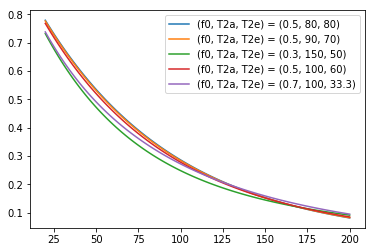

In [4]:
pl.figure()
for p in params:
    decay = app_T2_decay(TE, *p)
    pl.plot(TE, decay, label='(f0, T2a, T2e) = {}'.format(p))
pl.legend()
pl.show()

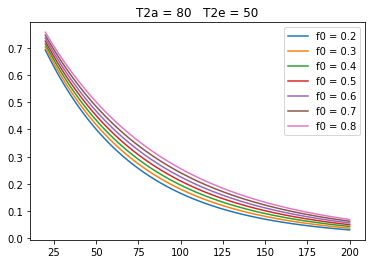

In [5]:
T2a = 80
T2e = 50
fs = np.linspace(0.2, 0.8, 7)
pl.figure()
pl.title('T2a = {}   T2e = {}'.format(T2a, T2e))
for f0 in fs:
    decay = app_T2_decay(TE, f0, T2a, T2e)
    pl.plot(TE, decay, label='f0 = {}'.format(f0))
pl.legend()
pl.show()

In [6]:
def app_f(TE, f0, T2a, T2e):
    return f0*np.exp(-TE/T2a) / app_T2_decay(TE, f0, T2a, T2e)

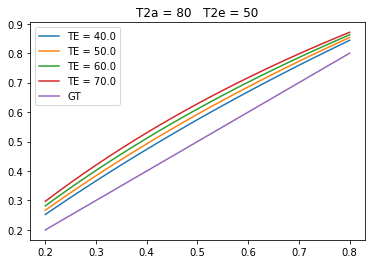

In [7]:
T2a = 80
T2e = 50
fs = np.linspace(0.2, 0.8, 25)
TEs = [40., 50., 60., 70.]

pl.figure()
pl.title('T2a = {}   T2e = {}'.format(T2a, T2e))
for TE in TEs:
    frac = app_f(TE, fs, T2a, T2e)
    pl.plot(fs, frac, label='TE = {}'.format(TE))
pl.plot(fs, fs, label='GT')
pl.legend()
pl.show()

In [8]:
def expfunc(TE, T2):
    return np.exp(-TE/T2)

In [9]:
import scipy.optimize as opt

T2a = 80
T2e = 50
f0 = 0.6

T2fit = []
for N in [3,5,10,25]:
    for TEmin in np.linspace(20,50,10):
        for TEmax in np.linspace(80,200,10):
            TE = np.linspace(TEmin, TEmax, N)
            decay = app_T2_decay(TE, f0, T2a, T2e)
            popt, _ = opt.curve_fit(expfunc, TE, decay, p0=70)
            T2fit.append(popt[0])


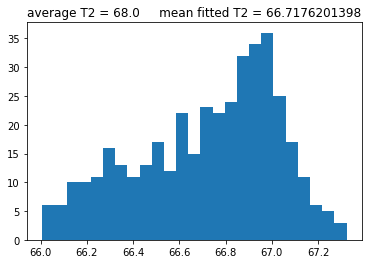

In [10]:
pl.figure()
pl.hist(T2fit, bins=25)
pl.title('average T2 = {}     mean fitted T2 = {}'.format(f0*T2a+(1-f0)*T2e, np.mean(T2fit)))
pl.show()

In [11]:
T2a = 80
T2e = 50
f0 = 0.6

sigma = 0.01 # snr = 100

T2fit = []
# for N in [3,5,10,25]:
for N in [5]:
    for TEmin in np.linspace(20,50,10):
        for TEmax in np.linspace(80,200,10):
            TE = np.linspace(TEmin, TEmax, N)
            decay = app_T2_decay(TE, f0, T2a, T2e) + sigma*np.random.randn(N)
            popt, _ = opt.curve_fit(expfunc, TE, decay, p0=70)
            T2fit.append(popt[0])

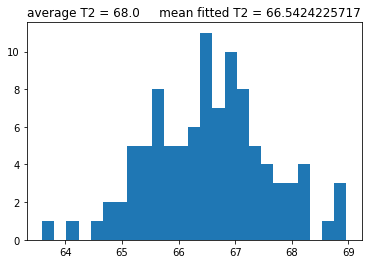

In [12]:
pl.figure()
pl.hist(T2fit, bins=25)
pl.title('average T2 = {}     mean fitted T2 = {}'.format(f0*T2a+(1-f0)*T2e, np.mean(T2fit)))
pl.show()

In [13]:
T2a = 80
T2e = 50
f0 = 0.6

sigma = 0.05 # snr = 20

T2fit = []
# for N in [3,5,10,25]:
for N in [5]:
    for TEmin in np.linspace(20,50,10):
        for TEmax in np.linspace(80,200,10):
            TE = np.linspace(TEmin, TEmax, N)
            decay = app_T2_decay(TE, f0, T2a, T2e) + sigma*np.random.randn(N)
            popt, _ = opt.curve_fit(expfunc, TE, decay, p0=70)
            T2fit.append(popt[0])

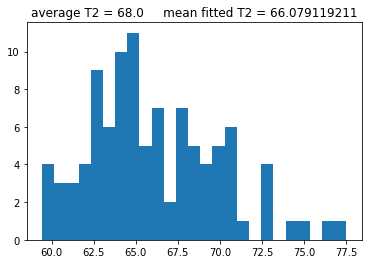

In [14]:
pl.figure()
pl.hist(T2fit, bins=25)
pl.title('average T2 = {}     mean fitted T2 = {}'.format(f0*T2a+(1-f0)*T2e, np.mean(T2fit)))
pl.show()